# **Proyecto en Grupo – Regresión Avanzada**
## **Predicción de Precios de Bienes Raíces en Australia**

# Tabla de Contenido

1. [Introduccion](#Introduccion)
2. [Configuracion e Instalacion](#Configuracion-e-Instalacion)
3. [Entendimiento de los Datos](#Entendimiento-de-los-Datos)  
4. [Analisis de Datos](#Analisis-de-Datos)
5. [Manipulacion y Limpieza de Datos](#Manipulacion-y-Limpieza-de-Datos)
6. [Preparacion de Datos y Modelado](#Preparacion-de-Datos-y-Modelado)
7. [Construccion-del-Modelo](#Model-Building)
8. [Conclusions y Observaciones](#Conclusiones-y-Observaciones)

# 1.- Introduccion

### Integrates de Grupo:
* Roger Oscar Antequera Crespo (roko92adc@gmail.com)


## Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.

### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# 2.- Configuracion e Instalacion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

### Extraemos el dataset con la informacion en la variable df

In [ ]:
df = pd.read_csv("/content/dataset.csv")

# 3.- Entendimiento de los Datos

### Dentro de los datos podemos observar que existen valores nulos, valores categoricos y valores numericos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Sacamos el listado en porcentaje de los valores nulos.

In [ ]:
all_data_missing = (df.isnull().sum() / len(df)) * 100
all_data_missing = all_data_missing.drop(all_data_missing[all_data_missing == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage':all_data_missing})
missing_data.head(30)

,Missing Percentage
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

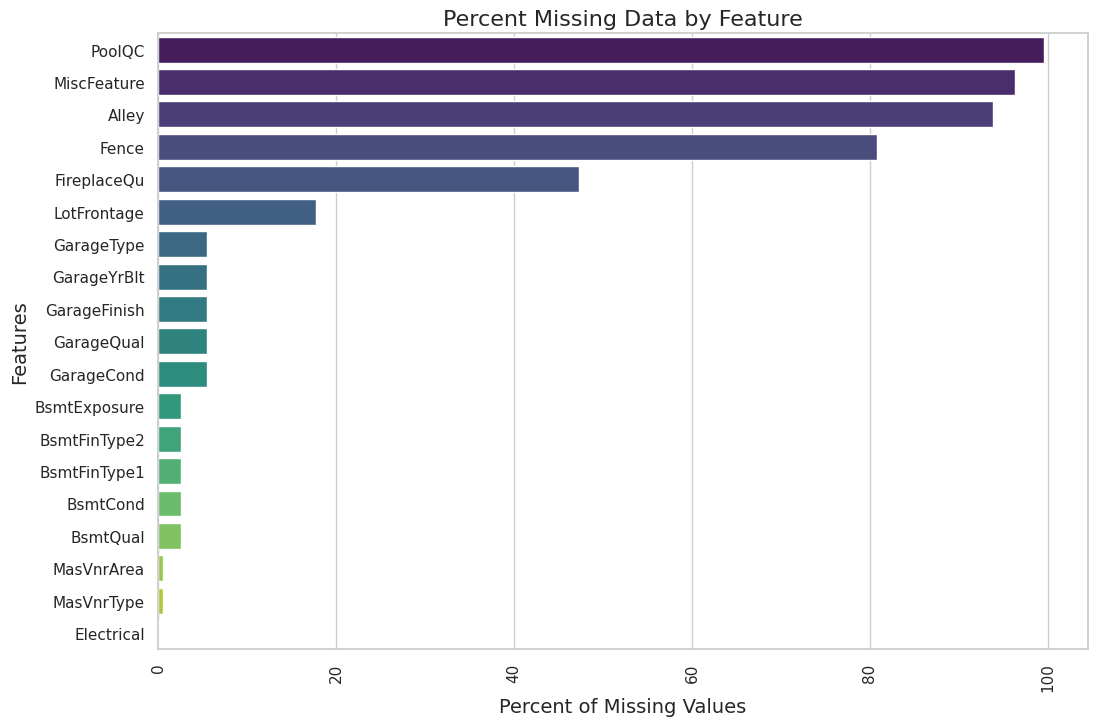

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Missing Percentage', y=missing_data.index, data=missing_data, ax=ax, palette='viridis')
ax.set_xlabel('Percent of Missing Values', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('Percent Missing Data by Feature', fontsize=16)
plt.xticks(rotation=90)

# 4.- Analisis de Datos

### Eliminamos la columna Id ya que esta variable genera problemas dentro del analisis al representar datos unicos

In [ ]:
df.drop("Id", axis = 1, inplace = True)

### Antes que nada debemos ver el comportamiento de nuestra variable "y" para ver si debemos normalizarla o no

<ipython-input-48-e8cc5c3612d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'] , fit=norm);



 mu = 180921.20 and sigma = 79415.29



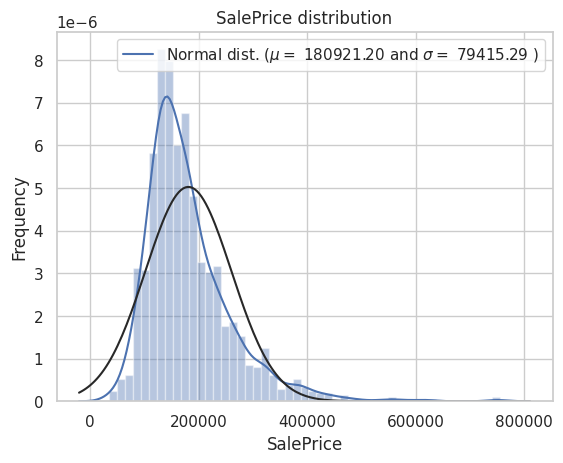

In [ ]:
from scipy.stats import norm
(mu, sigma) = norm.fit(df['SalePrice'])
sns.distplot(df['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

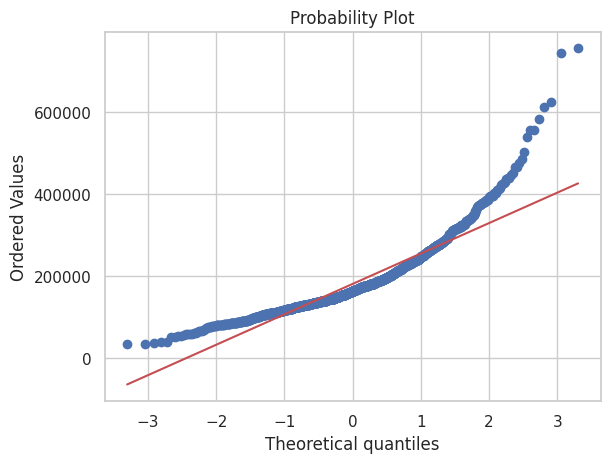

In [ ]:
import scipy.stats as stats
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

### Como se puede observar la variable tiene un sesgo por lo que se aplicara una funcion logaritmica que hara que esta variable tome una forma normal

In [ ]:
df["SalePrice"] = np.log1p(df["SalePrice"])

<ipython-input-51-608aea36438a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'] , fit=norm);



 mu = 12.02 and sigma = 0.40



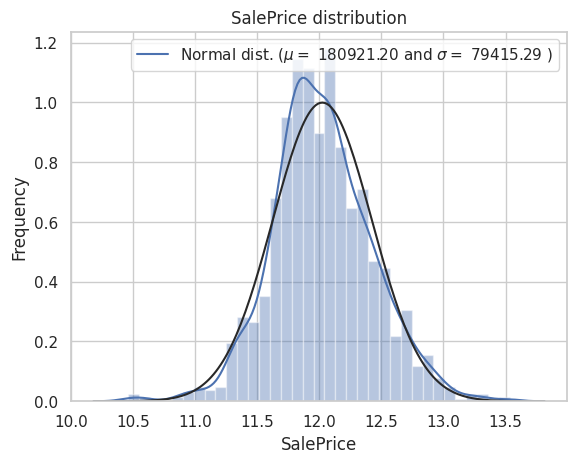

In [ ]:
sns.distplot(df['SalePrice'] , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

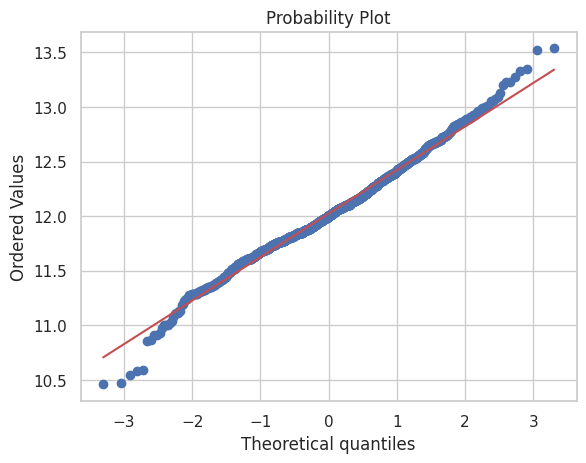

In [ ]:
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

Extraemos una variable y_train como auxiliar

In [ ]:
y_train = df.SalePrice.values
shape_df = df.shape[0]

In [ ]:
shape_df

1460

In [ ]:
numerical = df.select_dtypes(include=['int64','float64']).drop(['SalePrice'],axis=1)
numerical.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,Condition2,OverallQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold
0,5,65.0,8450,1,1,3,0,0,2,7,...,61,0,0,0,0,3,4,0,1,2
1,0,80.0,9600,1,1,3,0,0,2,6,...,0,0,0,0,0,3,4,0,4,1
2,5,68.0,11250,1,1,0,0,0,2,7,...,42,0,0,0,0,3,4,0,8,2
3,6,60.0,9550,1,1,0,0,0,2,7,...,35,272,0,0,0,3,4,0,1,0
4,5,84.0,14260,1,1,0,0,0,2,8,...,84,0,0,0,0,3,4,0,11,2


In [ ]:
categorical = df.select_dtypes(exclude=['int64','float64'])
categorical.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Para tener una vista del nivel de asociacion de las variables independientes con la variable dependiente se analizara el diagrama de correlacion

<ipython-input-55-92fc9cd0b94b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-55-92fc9cd0b94b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: title={'center': 'Overall Correlation of House Prices'}>

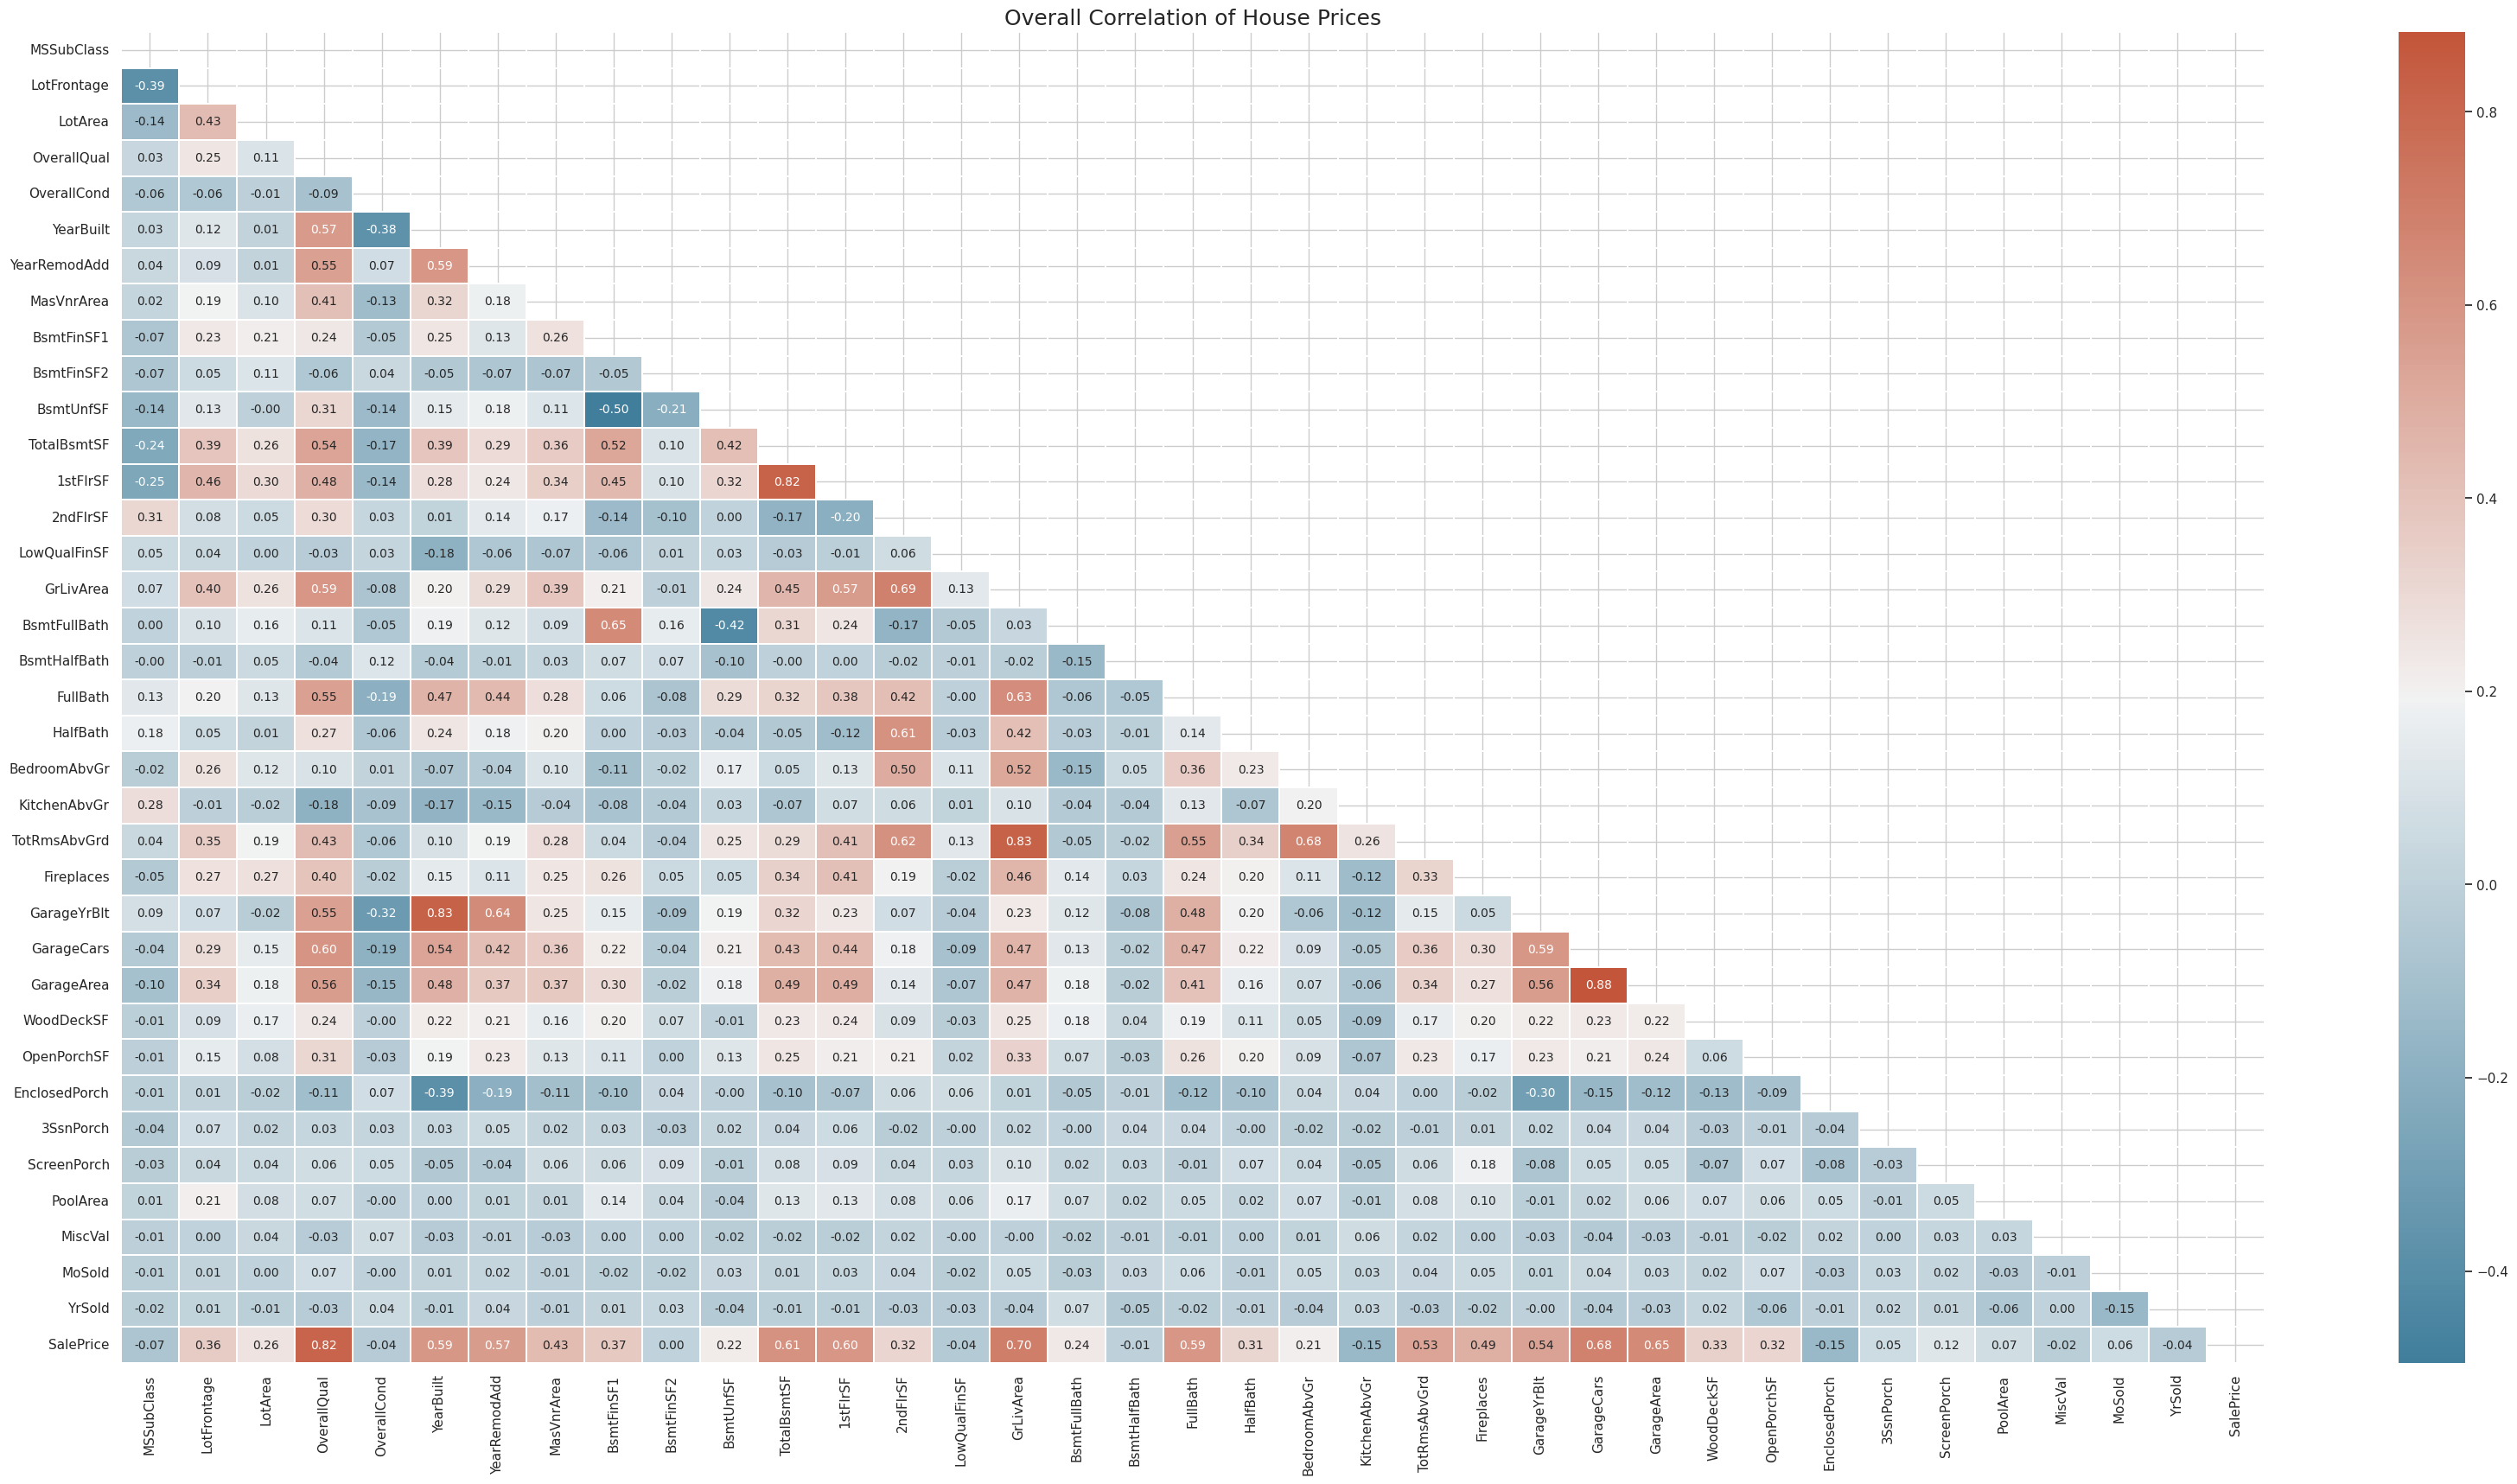

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(40, 20))
plt.title('Overall Correlation of House Prices', fontsize=18)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap, linewidths=0.2, annot_kws={'size': 10})

### Como se observa ciertas variables tienen un mayor grado de correlacion con la variable SalePrice. Especialmente las variables OverallQual, TotalBsmtSF,1stFlrSF, GrLivArea, GarageCars, GarageArea.

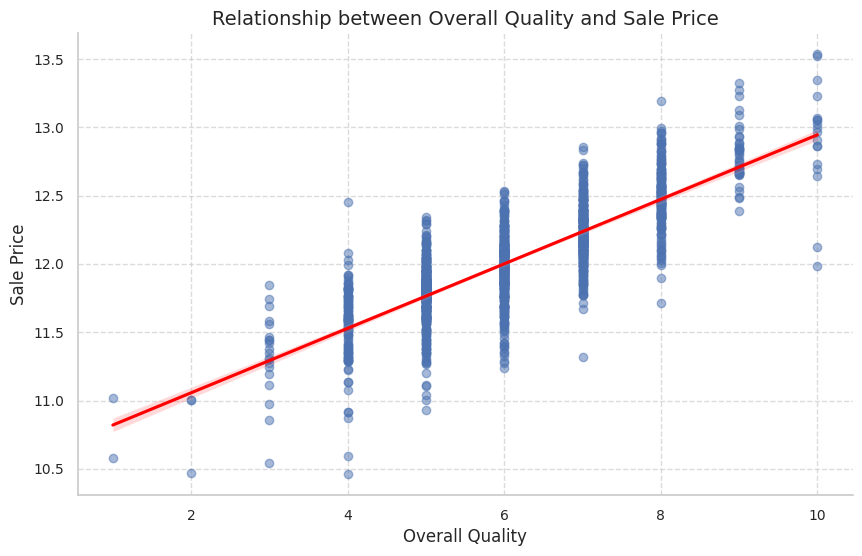

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.regplot(x='OverallQual', y='SalePrice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

ax.set_xlabel('Overall Quality', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)
ax.set_title('Relationship between Overall Quality and Sale Price', fontsize=14)

ax.tick_params(axis='both', which='both', labelsize=10)

sns.despine()
ax.grid(axis='both', linestyle='--', alpha=0.7)

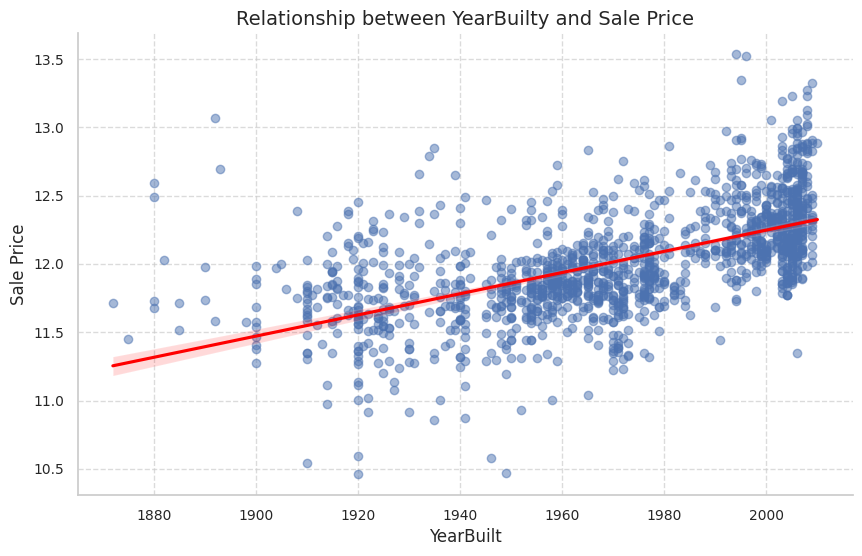

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.regplot(x='YearBuilt', y='SalePrice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

ax.set_xlabel('YearBuilt', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)
ax.set_title('Relationship between YearBuilty and Sale Price', fontsize=14)

ax.tick_params(axis='both', which='both', labelsize=10)

sns.despine()
ax.grid(axis='both', linestyle='--', alpha=0.7)

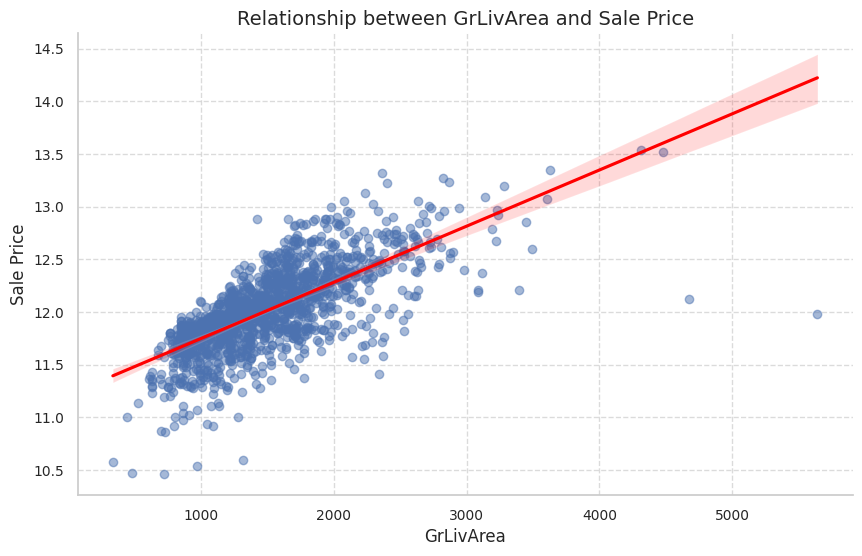

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

ax.set_xlabel('GrLivArea', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)
ax.set_title('Relationship between GrLivArea and Sale Price', fontsize=14)

ax.tick_params(axis='both', which='both', labelsize=10)
sns.despine()
ax.grid(axis='both', linestyle='--', alpha=0.7)

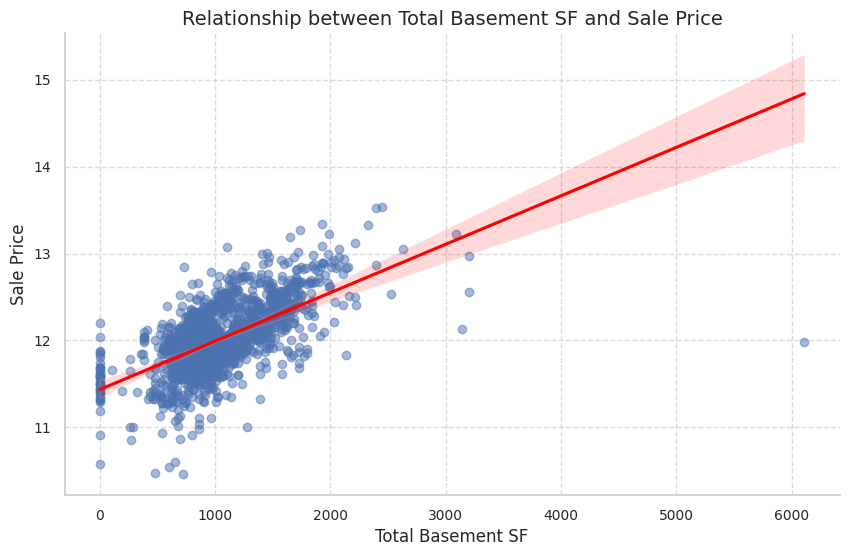

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

ax.set_xlabel('Total Basement SF', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)
ax.set_title('Relationship between Total Basement SF and Sale Price', fontsize=14)

ax.tick_params(axis='both', which='both', labelsize=10)
sns.despine()
ax.grid(axis='both', linestyle='--', alpha=0.7)


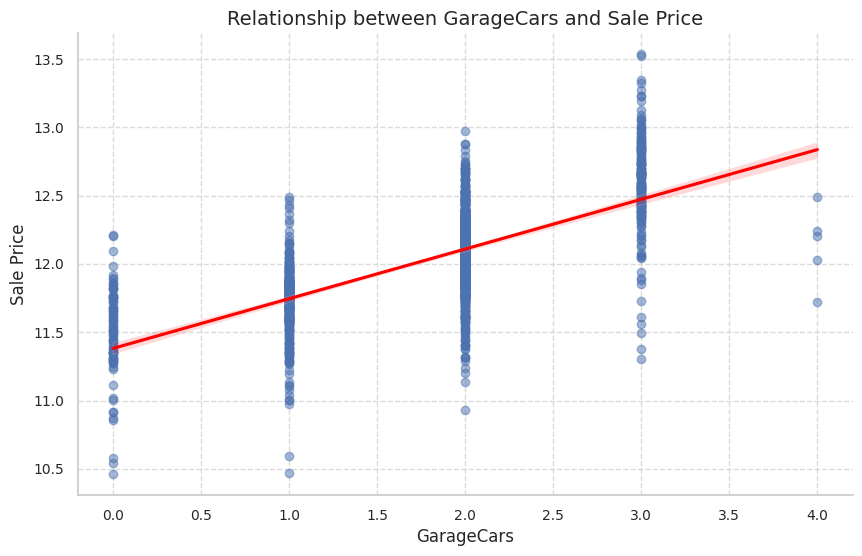

In [ ]:
#GarageCars
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.regplot(x='GarageCars', y='SalePrice', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

ax.set_xlabel('GarageCars', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)
ax.set_title('Relationship between GarageCars and Sale Price', fontsize=14)

ax.tick_params(axis='both', which='both', labelsize=10)
sns.despine()
ax.grid(axis='both', linestyle='--', alpha=0.7)

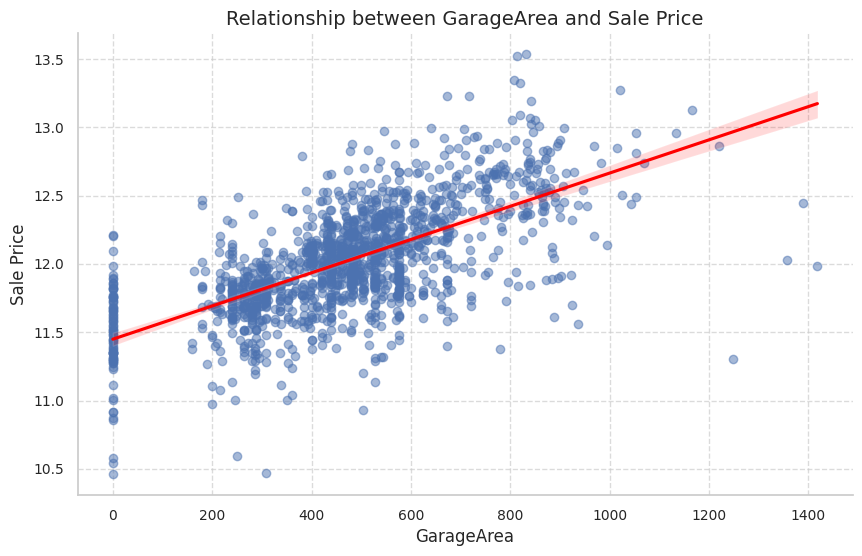

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.regplot(x='GarageArea', y='SalePrice', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

ax.set_xlabel('GarageArea', fontsize=12)
ax.set_ylabel('Sale Price', fontsize=12)
ax.set_title('Relationship between GarageArea and Sale Price', fontsize=14)

ax.tick_params(axis='both', which='both', labelsize=10)
sns.despine()
ax.grid(axis='both', linestyle='--', alpha=0.7)

In [ ]:
corr = df.corr()

<ipython-input-62-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [ ]:
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


Claramente se puede ver la dependencia de las variables. Esto debido al grado de correlacion de las mismas.

# 5.- Manipulacion y Limpieza de Datos

### A continuacion se trataran las variables categoricas y numericas ya que si bien existen datos NULL, algunos no deben ser tratados como tal ya que son valores vacios en el caso de variables categoricas y 0 en el caso de variables numericas.  Ademas los valores NULL como tal seran reemplazados por la moda y la media.

In [ ]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    df[col] = df[col].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    df[col] = df[col].fillna(0)

In [ ]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

<ipython-input-67-b166b8bead60>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))


### Al hablar de regresion debemos tomar en cuenta que los datos deben ser parametricos. Es por tal motivo que aquellas variables categoricas seran tratadas mediante Dummies para poder aplciar la regresion en las mismas.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold','Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c] = lbl.transform(list(df[c].values))

# Check on data shape
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (1460, 80)


In [ ]:
df = pd.get_dummies(df)

df.shape

(1460, 203)

# 6.- Preparacion de Datos y Modelado

### En este punto dividimos la data en 2 partes: Training y Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.2, random_state=42)

### A continuacion proseguimos con la Estandarizacion de loa data ya dividida en training y testing.

In [ ]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

### Una vez ya tratada la informacion se procede con la aplicacion de modelos

# 7.- Construccion del Modelado

Regression Ridge

In [ ]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
optimal_alpha = ridge_cv.alpha_
print("Optimal Alpha:", optimal_alpha)

Optimal Alpha: 100.0


In [ ]:
ridge_model = Ridge(alpha=100.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge MSE:", ridge_mse)
print("Ridge R^2:", ridge_r2)

Ridge MSE: 0.10695084917449449
Ridge R^2: 0.8930491508255055


Regression Lasso

In [ ]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_
print("Optimal Alpha:", optimal_alpha)

Optimal Alpha: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("Lasso MSE:", lasso_mse)
print("Lasso R^2:", lasso_r2)

Lasso MSE: 0.09872436502535398
Lasso R^2: 0.901275634974646


Regression ElasticNet

In [ ]:
alphas = [0.01, 0.1, 1.0, 10.0]
l1_ratios = [0.1, 0.5, 0.7, 0.9]
elasticnet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)
elasticnet_cv.fit(X_train, y_train)
optimal_alpha = elasticnet_cv.alpha_
optimal_l1_ratio = elasticnet_cv.l1_ratio_
print("Optimal Alpha:", optimal_alpha)
print("Optimal L1 Ratio:", optimal_l1_ratio)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal Alpha: 0.1
Optimal L1 Ratio: 0.1


In [ ]:
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_net_model.fit(X_train, y_train)
elastic_net_predictions = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)
print("Elastic Net MSE:", elastic_net_mse)
print("Elastic Net R^2:", elastic_net_r2)

Elastic Net MSE: 0.09867881547538596
Elastic Net R^2: 0.9013211845246141
